In [1]:
import numpy as np


In [6]:
x = np.array([2,1,4,3,5])
np.sort(x)
x.sort()
print(x)

[1 2 3 4 5]


In [10]:
x = np.array([2,1,4,3,5])
i = np.argsort(x) # Выводит номера аргументов, то как они должны быть отсортированны
print(i, x[i])


[1 0 3 2 4] [1 2 3 4 5]


### Sorting along rows and colomns

In [40]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [42]:
np.sort(X, axis=0) #меняются связи между строчками

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

### Partial sorting

In [52]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 3) #три самых маленьких значения вначале стоят

array([2, 1, 3, 4, 6, 5, 7])

### Example: K-NN

In [56]:
X = rand.rand(10,2)


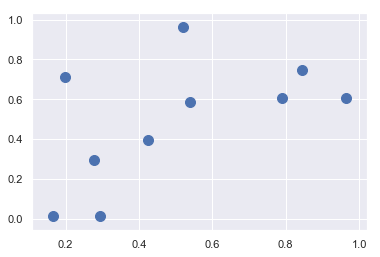

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100)

In [64]:
dist_sq = np.sum((X[:, np.newaxis, :] -X[np.newaxis,:,:])**2, axis=-1)
dist_sq

array([[0.        , 0.15051406, 0.1405466 , 0.32292363, 0.50203426,
        1.02046572, 0.33017808, 0.94866988, 0.16609382, 0.19872033],
       [0.15051406, 0.        , 0.11871086, 0.03425379, 0.52667471,
        0.99676458, 0.30156543, 0.84129265, 0.41821187, 0.02293751],
       [0.1405466 , 0.11871086, 0.        , 0.18151542, 0.15391124,
        0.46636629, 0.05033748, 0.38856886, 0.1317014 , 0.06311092],
       [0.32292363, 0.03425379, 0.18151542, 0.        , 0.57164624,
        0.9897328 , 0.33861435, 0.80286603, 0.59826884, 0.03065408],
       [0.50203426, 0.52667471, 0.15391124, 0.57164624, 0.        ,
        0.09101881, 0.03145098, 0.07993914, 0.17823498, 0.36028304],
       [1.02046572, 0.99676458, 0.46636629, 0.9897328 , 0.09101881,
        0.        , 0.2104603 , 0.01644311, 0.48513352, 0.73899268],
       [0.33017808, 0.30156543, 0.05033748, 0.33861435, 0.03145098,
        0.2104603 , 0.        , 0.1618874 , 0.15057399, 0.17907733],
       [0.94866988, 0.84129265, 0.3885688

In [75]:
print( X[:, np.newaxis, :].shape, X[np.newaxis,:,:].shape)

(10, 1, 2) (1, 10, 2)


In [92]:
#Объяснение того что произошло немного выше. По этапное представление
differences = X[:, np.newaxis, :] - X[np.newaxis,:,:]
print(differences.shape)
sq_differences = differences **2
print(sq_differences.shape)
dist_sq = sq_differences.sum(-1) #Указываешь по какой размерности производить сложение.(по последней)
print(dist_sq.shape)



(10, 10, 2)
(10, 10, 2)
(10, 10)


In [94]:
dist_sq.diagonal() # кроме того она ещё и симметричная

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [106]:
nearest = np.argsort(dist_sq, axis=1)
nearest # первая колонка как раз даст номер нужной точки. так как минимальное расстояние это и сть нулевое

array([[0, 2, 1, 8, 9, 3, 6, 4, 7, 5],
       [1, 9, 3, 2, 0, 6, 8, 4, 7, 5],
       [2, 6, 9, 1, 8, 0, 4, 3, 7, 5],
       [3, 9, 1, 2, 0, 6, 4, 8, 7, 5],
       [4, 6, 7, 5, 2, 8, 9, 0, 1, 3],
       [5, 7, 4, 6, 2, 8, 9, 3, 1, 0],
       [6, 4, 2, 8, 7, 9, 5, 1, 0, 3],
       [7, 5, 4, 6, 2, 8, 9, 3, 1, 0],
       [8, 2, 6, 0, 4, 9, 1, 5, 7, 3],
       [9, 1, 3, 2, 6, 0, 4, 8, 7, 5]], dtype=int64)

In [109]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1) # ибо матрица и так включает себя же)))
nearest_partition


array([[2, 0, 1, 8, 9, 5, 6, 7, 3, 4],
       [1, 9, 3, 2, 0, 5, 6, 7, 8, 4],
       [2, 6, 9, 1, 8, 0, 5, 7, 3, 4],
       [3, 9, 1, 2, 0, 5, 6, 7, 8, 4],
       [7, 6, 4, 5, 8, 2, 9, 1, 3, 0],
       [7, 5, 4, 6, 8, 2, 9, 1, 3, 0],
       [4, 6, 2, 8, 7, 9, 5, 1, 3, 0],
       [7, 5, 4, 6, 8, 2, 9, 1, 3, 0],
       [2, 8, 6, 0, 4, 5, 1, 7, 3, 9],
       [3, 1, 9, 2, 6, 0, 5, 7, 8, 4]], dtype=int64)

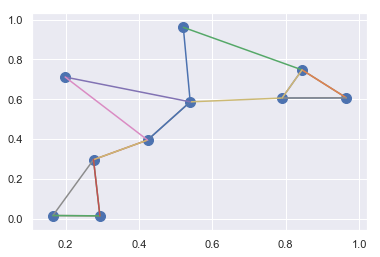

In [115]:
plt.scatter(X[:,0], X[:,1], s=100)
K =2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # рисуем линию от i до j
        plt.plot(*zip(X[j], X[i]))